[(1, 2, 4, 3), (1, 2, 3, 4)]


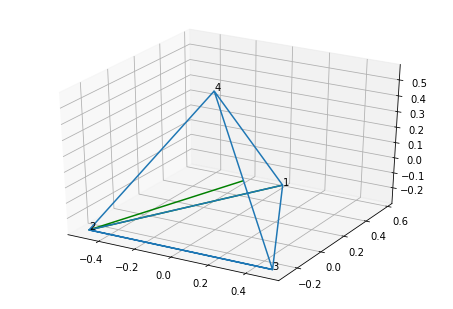


[(1, 3, 2, 4), (1, 2, 3, 4)]


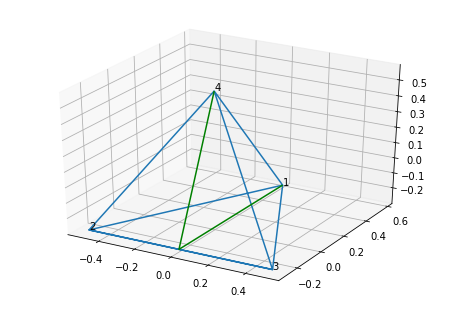


[(1, 4, 2, 3), (1, 3, 4, 2), (1, 2, 3, 4)]


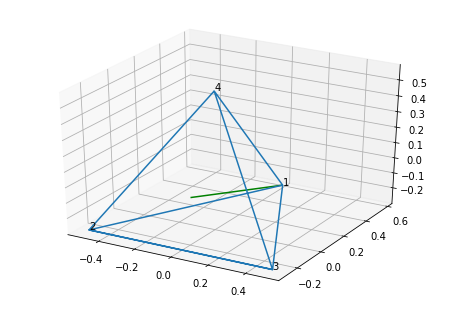

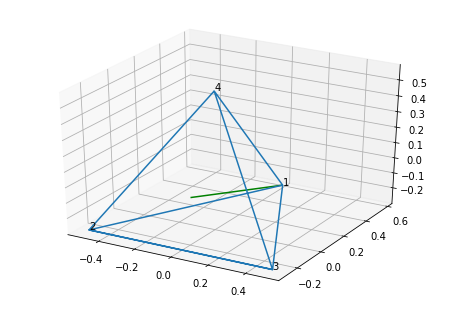


[(1, 4, 3, 2), (1, 2, 3, 4)]


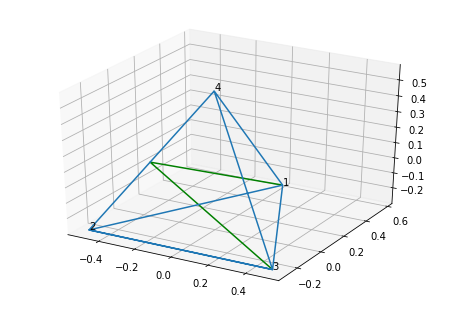


[(2, 1, 3, 4), (1, 2, 3, 4)]


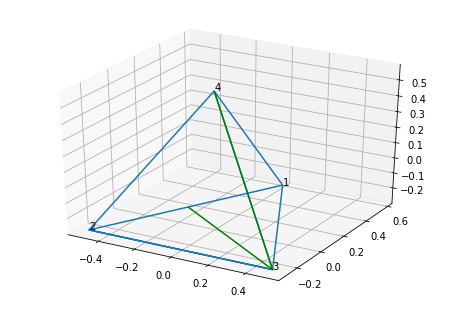


[(1, 2, 3, 4), (2, 1, 4, 3)]


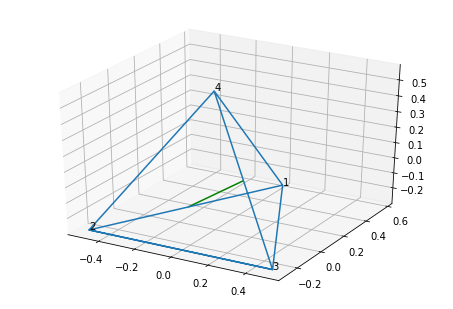


[(2, 3, 1, 4), (3, 1, 2, 4), (1, 2, 3, 4)]


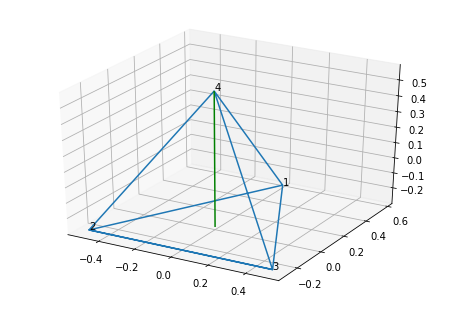

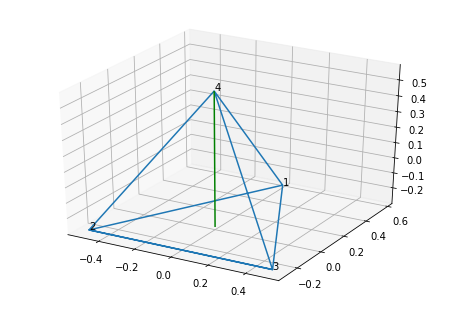


[(3, 4, 1, 2), (4, 1, 2, 3), (1, 2, 3, 4), (2, 3, 4, 1)]


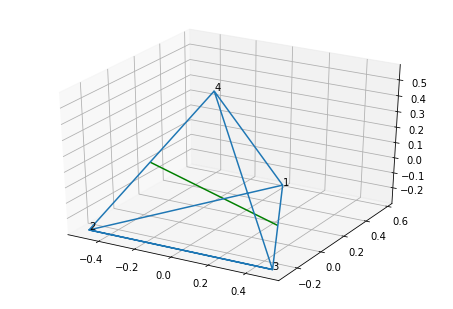

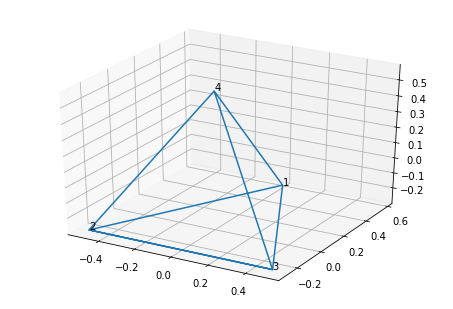

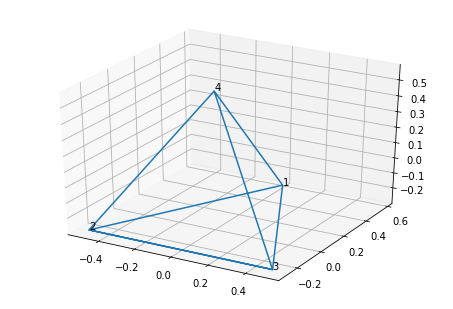


[(4, 3, 2, 1), (3, 1, 4, 2), (1, 2, 3, 4), (2, 4, 1, 3)]


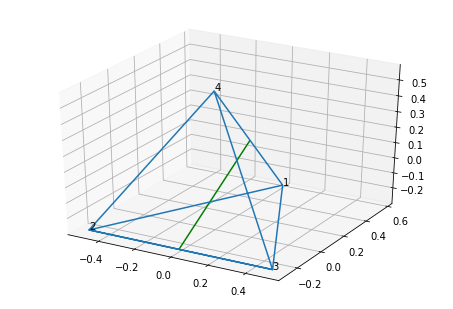

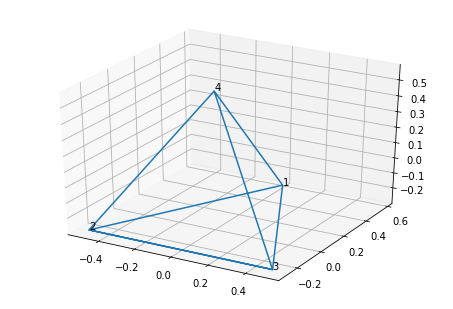

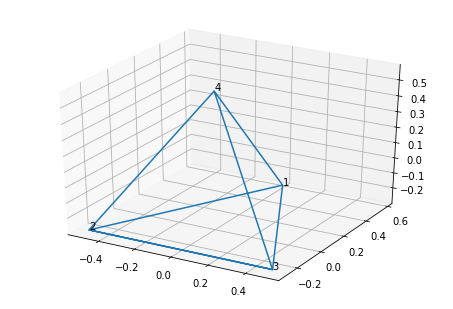


[(1, 2, 3, 4), (4, 1, 3, 2), (2, 4, 3, 1)]


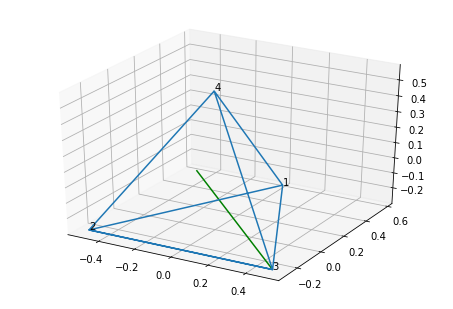

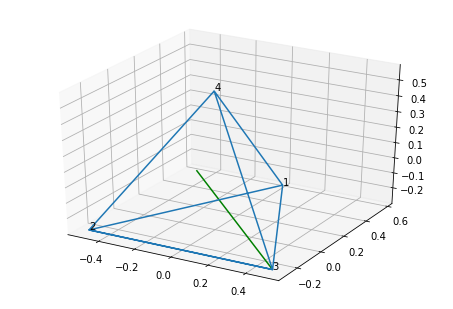


[(3, 2, 1, 4), (1, 2, 3, 4)]


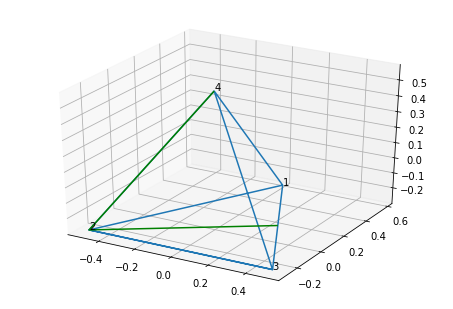


[(3, 2, 4, 1), (4, 2, 1, 3), (1, 2, 3, 4)]


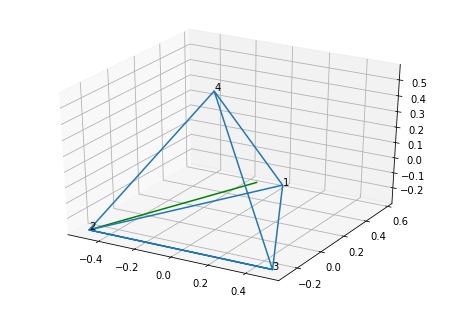

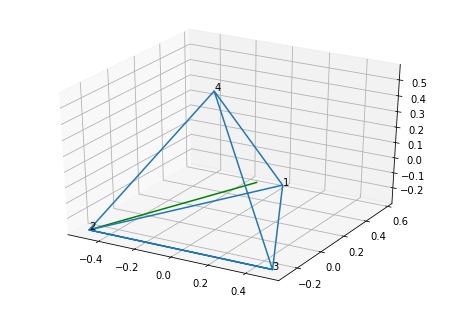


[(3, 4, 1, 2), (1, 2, 3, 4)]


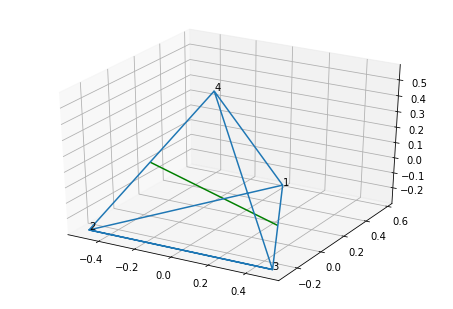


[(3, 4, 2, 1), (4, 3, 1, 2), (1, 2, 3, 4), (2, 1, 4, 3)]


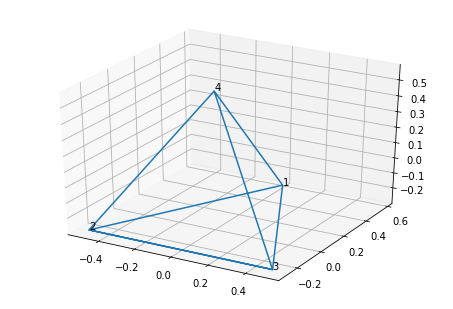

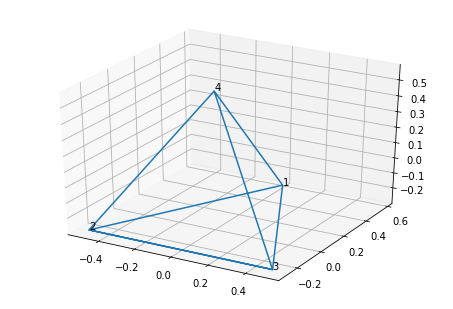

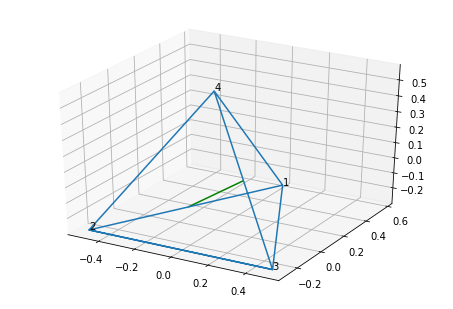


[(4, 2, 3, 1), (1, 2, 3, 4)]


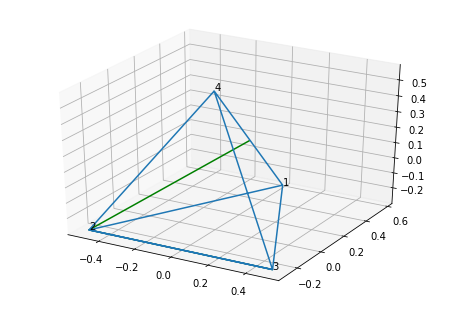


[(4, 3, 2, 1), (1, 2, 3, 4)]


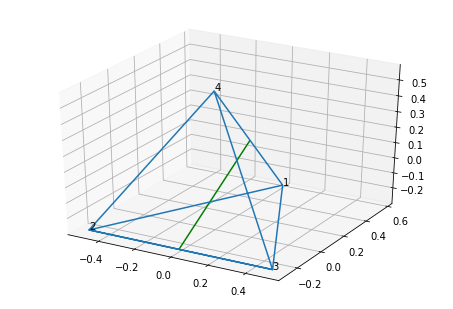

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

class e:
    """ Transmutation element class """
    def __init__(self, p_x):
        self.x = tuple()
        self.x = p_x
        
    def __str__(self):
        return str(self.x)
    
    def __mul__(self, other):
        """ Multiply transmutations """
        return e(tuple(other.x[self.x[i]-1] for i in range(0, len(self.x))))
    
    def __invert__(self):
        """ Invert transmutation """
        return e(tuple(self.x.index(i+1)+1 for i in range(0, len(self.x))))

class G:
    def __init__(self):
        self.o = None        # Neutral element
        self.m = set()       # Groups set
        self.l = []          # Group's elements list
        self.ne = {}         # Element's labels dict
        self.en = {}         # Element's labels dict
        self.t = []          # Opermatrix
        self.sgl = []        # Subgroups list
        
    def addl(self, p_e, p_n):
        """ Add element with label to group """
        self.m.add(p_e)
        self.l.append(p_e)
        self.ne[p_n] = p_e
        self.en[p_e] = p_n
        
    def setm(self):
        """ Fill opermatrix """
        for i_e in self.l:
            r = [(e(i_e)*e(i)).x for i in self.l]
            self.t.append(r)
            
    def getm(self):
        """ Print opermatrix by elements """
        for i in range(0, len(self.l)):
            for j in range(0, len(self.l)):
                print(self.t[i][j], end = ' ')
            print()
            
    def getml(self):
        """ Print opermatrix by labels """
        for i in range(0, len(self.l)):
            for j in range(0, len(self.l)):
                print('{0:3}'.format(self.en[self.t[i][j]]), end = ' ')
            print()
            
    def check(self):
        """ Verify group axioms """
        self.o = None
        M = set(x for x in self.l)
        for i in range(0, len(self.l)):
            N = set(x for x in self.t[i])
            if(M != N):
                return False
            for j in range(0, len(self.l)):
                if self.t[i][j] == self.l[j]:
                    self.o = self.l[i]
        if self.o == None:
            return False
        else:
            return True
        
    def subGroups(self):
        
        for i in range(0, len(self.l)):
            if self.l[i] != self.o:
                sg = set()
                next = self.l[i]
                sg.add(self.o)
                sg.add(next)
                for j in range(0, len(self.l)):
                    ln = len(sg)
                    next = (e(next)*e(self.l[i])).x
                    sg.add(next)
                    if ln == len(sg):
                        sG = G()
                        for x in sg:
                            sG.addl(x, self.en[x])
                        sG.setm()
                        if sG.check():
                            new = True
                            for z in self.sgl:
                                if z.m == sG.m:
                                    new = False
                            if new:
                                self.sgl.append(sG)
                            break
def plot_tetra(l1,l2):
    fig=plt.figure()
    ax = Axes3D(fig)

    mu = np.tan(np.radians(30))

    X = [0, 0, -1/2, 1/2, 0]
    Y = [0, mu,-mu/2,-mu/2,0]
    Z = [0, -mu/2,-mu/2,-mu/2,mu]

    x = np.array([X[1], X[2], X[3], X[4], X[1], X[3], X[2], X[4]])
    y = np.array([Y[1], Y[2], Y[3], Y[4], Y[1], Y[3], Y[2], Y[4]])
    z = np.array([Z[1], Z[2], Z[3], Z[4], Z[1], Z[3], Z[2], Z[4]])
    
    for t in range(1, 5):
        ax.text(X[t], Y[t], Z[t], str(t))

    ax.plot_wireframe(x, y, z)
    
    cl = []
    us = set()
    lx = []
    ly = []
    lz = []

    for i, v in enumerate(l1):
        s_cycle = v
        p_cycle = 0
        j = i
        lc = set()
        while s_cycle != p_cycle and not (s_cycle in us):
            p_cycle = l2[j]
            j = l1.index(p_cycle)
            lc.add(p_cycle)
            us.add(p_cycle)
        if p_cycle != 0:
            cl.append(lc)

    if len(cl) > 1:
        for i, k in enumerate(cl):
            dx = 0
            dy = 0
            dz = 0
            for l in k:
                dx = dx + X[l]
                dy = dy + Y[l]
                dz = dz + Z[l]
            lx.append(dx/len(k))
            ly.append(dy/len(k))
            lz.append(dz/len(k))

        Odx = np.array(lx)
        Ody = np.array(ly)
        Odz = np.array(lz)

        ax.plot_wireframe(Odx, Ody, Odz, color="green")
        
    plt.show()
    
g = G()

s = set((1,2,3,4))
name = 0
for i in s:
    for j in s:
        for k in s:
            for l in s:
                t = set((i,j,k,l))
                if t == s:
                    name = name + 1
                    g.addl(tuple((i,j,k,l)),str(name))
g.setm()
g.check()
g.subGroups()

for sg in g.sgl:
    print(sg.l)
    for el in sg.l:
        if el != sg.o:
            plot_tetra(sg.o, el)
    print()

